### 2020/08/04
- （p値が同じかどうか（必要ない、サンプルが異なるから））
- 選択される特徴量が同じかどうか（ランキングを付けた際に同じ特徴量が選ばれているか）
- サンプル数...to_qubo10_p, to_bqm10_p:100で、enu10_pは210
- (結果)最小のpを持つ特徴量は3つの手法どれでも同じだった。
- (結果)各p値やA以外のp値の順番は異なることもあった

### 2020/08/18
- mushroom_lデータを更新してt^0を出した

In [7]:
import pandas as pd 
import numpy as np

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
#比較対象
enul_p_conf4 = pd.read_csv("../output/mushrooml/enul_p_conf4.csv", sep=',', index_col=0)

In [10]:
enul_p_conf4

,0,1,2,3,5,6,7,8,9,10,...,109,110,111,112,113,114,115,116,117,118
0,1.0,0.001786,0.785714,1.0,0.607143,0.35,1.0,0.9,0.785714,1.0,...,1.0,0.9,1.0,0.785714,0.35,1.0,1.0,1.0,1.0,0.1875


In [11]:
#enul_pにおける各列の最大値
enul_p_conf4.idxmin(axis=1) #1です

0    1
dtype: object

In [12]:
enul_p_conf4.columns

Index(['0', '1', '2', '3', '5', '6', '7', '8', '9', '10',
       ...
       '109', '110', '111', '112', '113', '114', '115', '116', '117', '118'],
      dtype='object', length=118)

---------
-------
今回使うデータ
- 各試行10回ずつ
- 交絡因子として'4'を固定
- データはmushroom_l

In [13]:
#X軸
numreads_10 = np.logspace(1, 4, num=4, base=10, dtype=int)
numreads_5 = [ll*100 for ll in range(1, 21) if ll%5==0 or ll==1]

### 16bit, using mushroom dataset

#### t^0のみ

In [17]:
#10回分
to_qubol_samples_p_conf4 = {}
to_qubol_samples_p_conf4['10'] = pd.read_csv("../output/mushrooml/to_qubol_10samples_p_10time_conf4.csv", sep=',', index_col=0)
to_qubol_samples_p_conf4['100'] = pd.read_csv("../output/mushrooml/to_qubol_100samples_p_10time_conf4.csv", sep=',', index_col=0)
to_qubol_samples_p_conf4['500'] = pd.read_csv("../output/mushrooml/to_qubol_500samples_p_10time_conf4.csv", sep=',', index_col=0)
to_qubol_samples_p_conf4['1000'] = pd.read_csv("../output/mushrooml/to_qubol_1000samples_p_10time_conf4.csv", sep=',', index_col=0)
to_qubol_samples_p_conf4['1500'] = pd.read_csv("../output/mushrooml/to_qubol_1500samples_p_10time_conf4.csv", sep=',', index_col=0)
to_qubol_samples_p_conf4['2000'] = pd.read_csv("../output/mushrooml/to_qubol_2000samples_p_10time_conf4.csv", sep=',', index_col=0)
to_qubol_samples_p_conf4['10000'] = pd.read_csv("../output/mushrooml/to_qubol_10000samples_p_10time_conf4.csv", sep=',', index_col=0)

[0.0, 0.001, 0.0014007007007007008, 0.0015305242209048935]


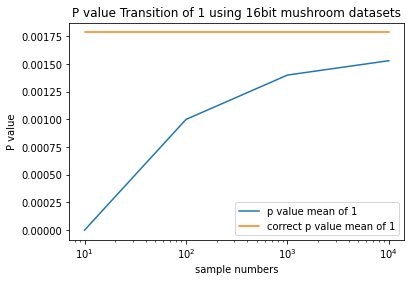

In [18]:
# 画像のプロット先の準備
fig = plt.figure()

#y軸
qubol_conf4_lg_mean_list = []
qubol_conf4_lg_mean_list.append(to_qubol_samples_p_conf4['10']['1'].mean())
qubol_conf4_lg_mean_list.append(to_qubol_samples_p_conf4['100']['1'].mean())
qubol_conf4_lg_mean_list.append(to_qubol_samples_p_conf4['1000']['1'].mean())
qubol_conf4_lg_mean_list.append(to_qubol_samples_p_conf4['10000']['1'].mean())
print(qubol_conf4_lg_mean_list)

plt.plot(numreads_10, qubol_conf4_lg_mean_list, label='p value mean of 1')
plt.plot(numreads_10, [enul_p_conf4['1']]*4, label='correct p value mean of 1')

ax = plt.gca()
ax.set_xscale('log')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('P value')
plt.legend()

fig.savefig('../output/mushrooml/t0t1_conf4_10_10000_meanP.png')

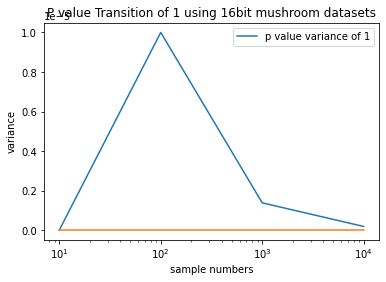

In [19]:
# 画像のプロット先の準備
fig = plt.figure()

#y軸
qubol_conf4_lg_var_list = []
qubol_conf4_lg_var_list.append(to_qubol_samples_p_conf4['10']['1'].var())
qubol_conf4_lg_var_list.append(to_qubol_samples_p_conf4['100']['1'].var())
qubol_conf4_lg_var_list.append(to_qubol_samples_p_conf4['1000']['1'].var())
qubol_conf4_lg_var_list.append(to_qubol_samples_p_conf4['10000']['1'].var())

plt.plot(numreads_10, qubol_conf4_lg_var_list, label='p value variance of 1')
plt.plot(numreads_10, [0]*4)

ax = plt.gca()
ax.set_xscale('log')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('variance')
plt.legend()

fig.savefig('../output/mushrooml/t0t1_conf4_10_10000_varP.png')

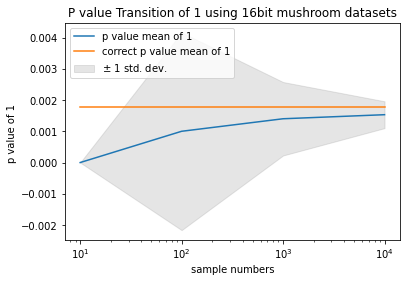

In [22]:
# 画像のプロット先の準備
fig = plt.figure()

# mean±std1
qubol_conf4_lg_std_list = [ii**0.5 for ii in qubol_conf4_lg_var_list]
qubol_conf4_lg_lower = (np.array(qubol_conf4_lg_mean_list) + np.array(qubol_conf4_lg_std_list)).tolist()
qubol_conf4_lg_upper = (np.array(qubol_conf4_lg_mean_list) - np.array(qubol_conf4_lg_std_list)).tolist()
plt.fill_between(numreads_10, qubol_conf4_lg_lower, qubol_conf4_lg_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

# mean
plt.plot(numreads_10, qubol_conf4_lg_mean_list, label='p value mean of 1')

# 本当の値
plt.plot(numreads_10, [enul_p_conf4['1']]*4, label='correct p value mean of 1')

ax = plt.gca()
ax.set_xscale('log')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('p value of 1 ')
plt.legend(loc="upper left")

plt.show()

fig.savefig('../output/mushrooml/t0_10_10000_P.png')

[0.001, 0.0034004008016032066, 0.0014007007007007008, 0.0018673337780742716, 0.002150700550475438]


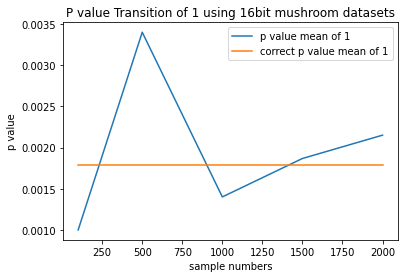

In [23]:
# 画像のプロット先の準備
fig = plt.figure()

#y軸
qubol_conf4_5_mean_list = []
qubol_conf4_5_mean_list.append(to_qubol_samples_p_conf4['100']['1'].mean())
qubol_conf4_5_mean_list.append(to_qubol_samples_p_conf4['500']['1'].mean())
qubol_conf4_5_mean_list.append(to_qubol_samples_p_conf4['1000']['1'].mean())
qubol_conf4_5_mean_list.append(to_qubol_samples_p_conf4['1500']['1'].mean())
qubol_conf4_5_mean_list.append(to_qubol_samples_p_conf4['2000']['1'].mean())
print(qubol_conf4_5_mean_list)

plt.plot(numreads_5, qubol_conf4_5_mean_list, label='p value mean of 1')
plt.plot(numreads_5, [enul_p_conf4['1']]*5, label='correct p value mean of 1')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('p value')
plt.legend()

fig.savefig('../output/mushrooml/t0_100_2000_meanP.png')

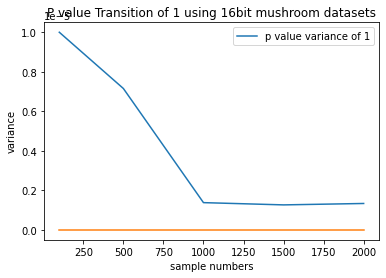

In [24]:
# 画像のプロット先の準備
fig = plt.figure()

#y軸
qubol_conf4_5_var_list = []
qubol_conf4_5_var_list.append(to_qubol_samples_p_conf4['100']['1'].var())
qubol_conf4_5_var_list.append(to_qubol_samples_p_conf4['500']['1'].var())
qubol_conf4_5_var_list.append(to_qubol_samples_p_conf4['1000']['1'].var())
qubol_conf4_5_var_list.append(to_qubol_samples_p_conf4['1500']['1'].var())
qubol_conf4_5_var_list.append(to_qubol_samples_p_conf4['2000']['1'].var())

plt.plot(numreads_5, qubol_conf4_5_var_list, label='p value variance of 1')
plt.plot(numreads_5, [0]*5)

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('variance')
plt.legend()

fig.savefig('../output/mushrooml/t0_100_2000_varP.png')

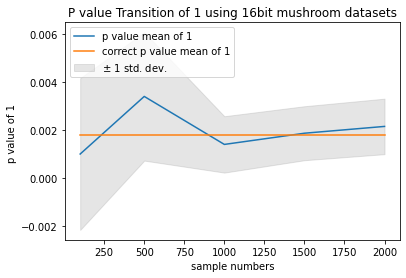

In [25]:
# 画像のプロット先の準備
fig = plt.figure()

# mean±std1
qubol_conf4_5_std_list = [ii**0.5 for ii in qubol_conf4_5_var_list]
qubol_conf4_5_lower = (np.array(qubol_conf4_5_mean_list) + np.array(qubol_conf4_5_std_list)).tolist()
qubol_conf4_5_upper = (np.array(qubol_conf4_5_mean_list) - np.array(qubol_conf4_5_std_list)).tolist()
plt.fill_between(numreads_5, qubol_conf4_5_lower, qubol_conf4_5_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')


# mean
plt.plot(numreads_5, qubol_conf4_5_mean_list, label='p value mean of 1')

# 本当の値
plt.plot(numreads_5, [enul_p_conf4['1']]*5, label='correct p value mean of 1')

plt.title('P value Transition of 1 using 16bit mushroom datasets')
plt.xlabel('sample numbers')
plt.ylabel('p value of 1 ')
plt.legend(loc="upper left")

plt.show()

fig.savefig('../output/mushrooml/t0_100_2000_P.png')